## Outlier Engineering: [Capping-IQR-proximity-rule - "Boston House dataset"]


An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980].

Statistics such as the mean and variance are very susceptible to outliers. In addition, **some Machine Learning models are sensitive to outliers** which may decrease their performance. Thus, depending on which algorithm we wish to train, we often remove outliers from our variables.

Earlier we discussed how to identify outliers. In this notebook, we will discuss how we can process them to train our machine learning models.


## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- winsorization
- capping


## Censoring or Capping.

**Censoring**, or **capping**, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are **censored**.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

The numbers at which to cap the distribution can be determined:

- arbitrarily
- using the inter-quantal range proximity rule
- using the gaussian approximation
- using quantiles


### Advantages

- does not remove data

### Limitations

- distorts the distributions of the variables
- distorts the relationships among variables


## In this Demo

We will see how to perform capping with the inter-quantile range proximity rule using the Boston House Dataset

## Important

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

please keep that in mind when setting up your pipelines

In [ ]:
#(base) C:\Users\AbhiSai>conda install -c conda-forge feature_engine
# feature_engine-1.5.2    |    pyhd8ed1ab_0    85 KB  conda-forge

https://feature-engine.readthedocs.io/en/0.6.x_a/quickstart.html

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# Importing the 'Winsorizer' module from 'feature_engine.outlier'
from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")

## Load the the Boston House price dataset from sklearn and create a dataframe with the 3 independent variables

In [2]:
# load the the Boston House price dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [3]:
# add the target
boston['MEDV'] = boston_dataset.target
boston

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2
...,...,...,...,...
501,6.593,9.67,0.06263,22.4
502,6.120,9.08,0.04527,20.6
503,6.976,5.64,0.06076,23.9
504,6.794,6.48,0.10959,22.0


## function to create histogram, Q-Q plot and boxplot. 

In [4]:
# function to create histogram, Q-Q plot and boxplot. 
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### outliers in RM

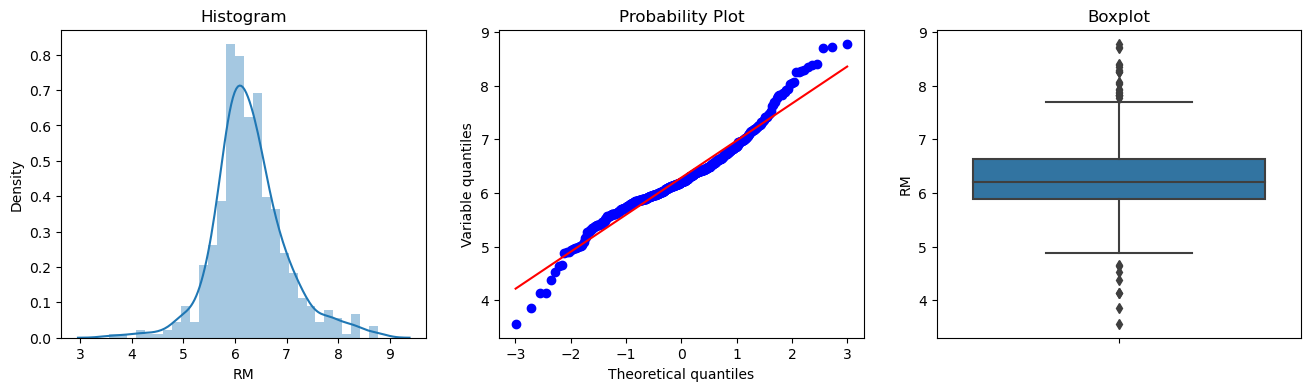

In [5]:
# let's find outliers in RM
diagnostic_plots(boston, 'RM')

### outliers in LSTAT

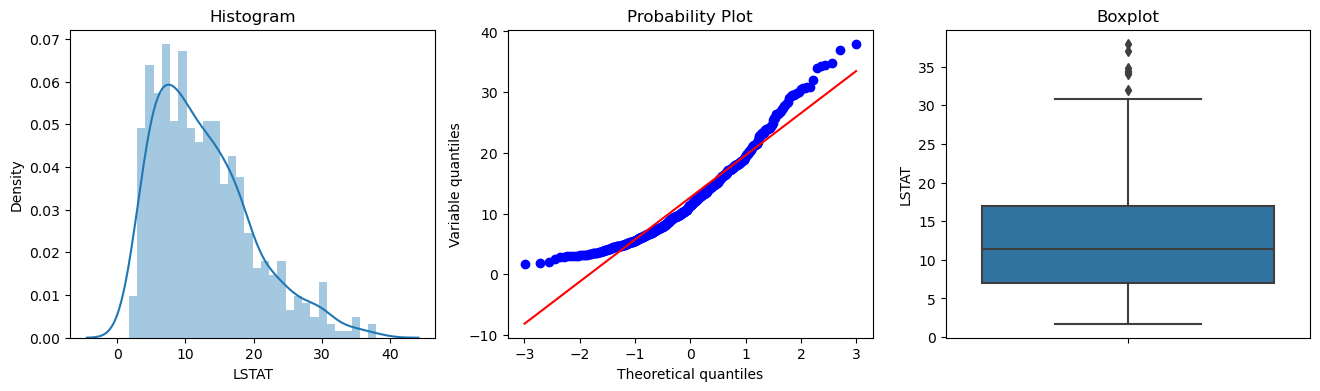

In [6]:
# visualise outliers in LSTAT
diagnostic_plots(boston, 'LSTAT')

### outliers in CRIM

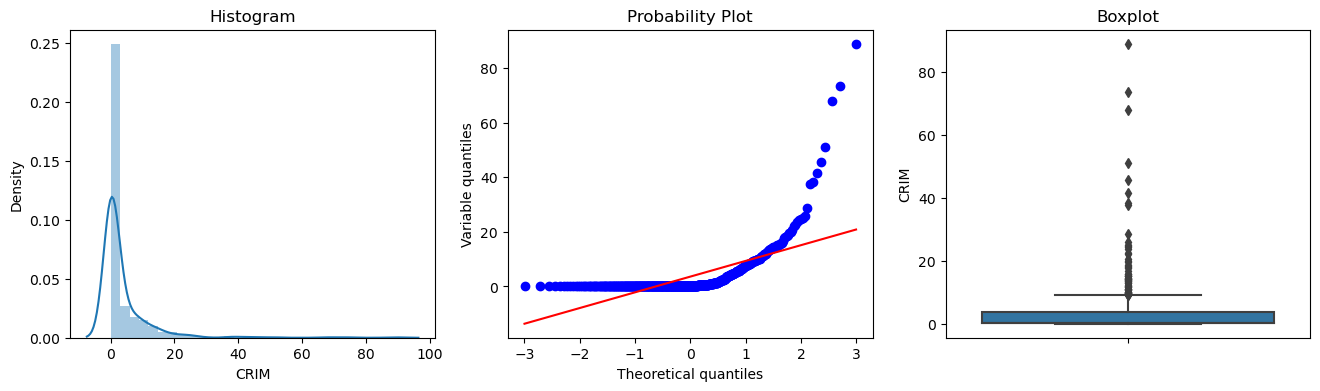

In [7]:
# outliers in CRIM
diagnostic_plots(boston, 'CRIM')

- **There are outliers in all of the above variables. RM shows outliers in both tails, whereas LSTAT and CRIM only on the right tail.**

## To find the outliers, let's re-utilise the function "Outlier Detection - "Inter-quantile range Proximity rule" for Skewed variables

In [8]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers for skewed distributions

    # Distance passed as an argument, gives us the option 
    ## to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) # Q3 - Q1

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

### find limits for RM

In [9]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

### limits for LSTAT

In [10]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

### limits for CRIM

In [11]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

## Now let's replace straight away the outliers by the maximum and minimum limit, instead of creating boolean values before!

- **Replacing the Values if value if greater than Upper Limit CAP it by Upper Limit value and if value is lower than lower limit we will CAP it by Replacing with Lower limit value**

In [12]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [13]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [14]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

## let's explore outliers in the trimmed dataset for RM, LSTAT and CRIM


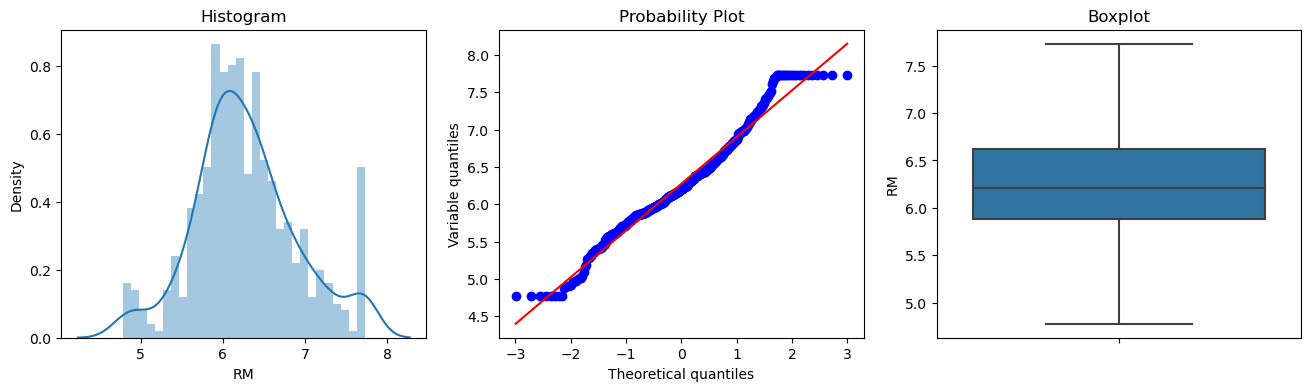

In [15]:
# let's explore outliers in the trimmed dataset for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

- **The horizontol lines in Q-Q Plot represent that we CAPed the values with Upper and Lower limit for all the outliers**
**we see much less outliers as in the original dataset**

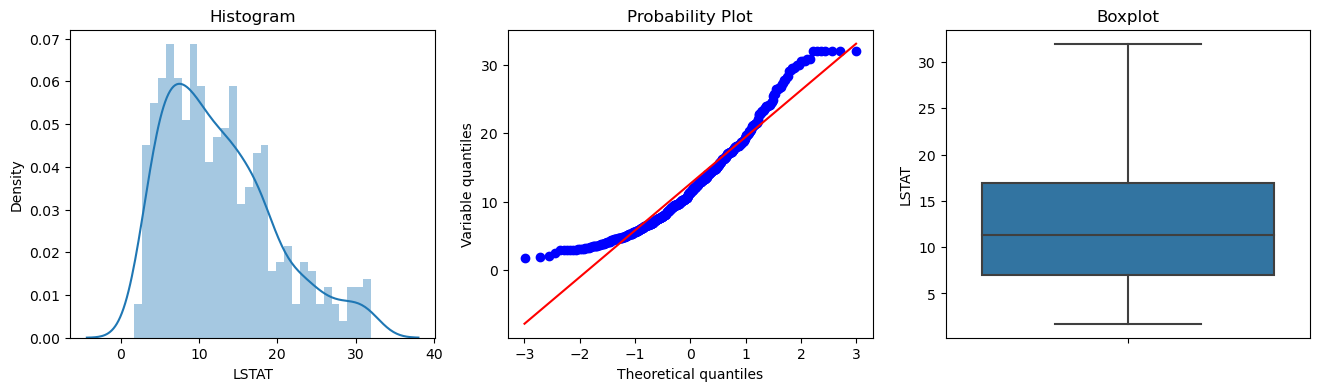

In [16]:
diagnostic_plots(boston, 'LSTAT')

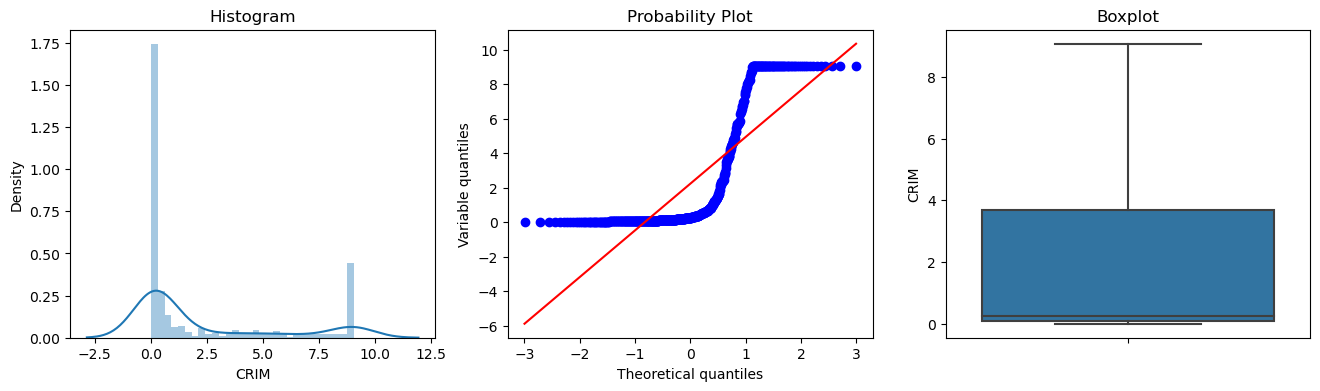

In [17]:
diagnostic_plots(boston, 'CRIM')

- **We can see that the outliers are gone, but the variable distribution was distorted quite a bit.**

## Performing CAPPING using IQR rule Proximity range with 'feature_engine'

## Censoring with Feature-engine

In [18]:
# load the the Boston House price data load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [19]:
# create the capper (Winsorizer from 'feature_engine')

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails (or we can use min or max values)
                          fold=1.5,   # How many time we want to multiply IQR range
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [20]:
## Now, Transform the data
boston_t = windsoriser.transform(boston)

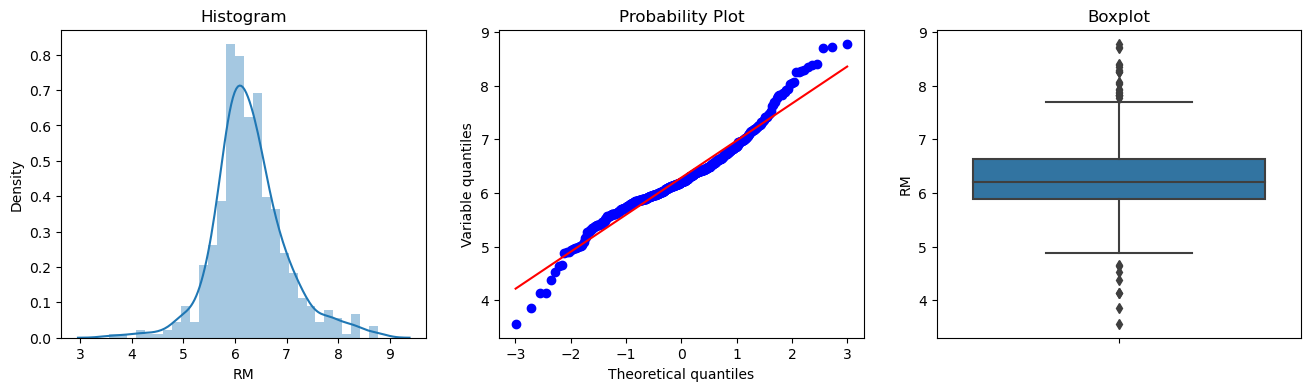

In [21]:
# Comparing this Original variable plots with 'Transformed data i.e "boston_t"'
diagnostic_plots(boston, 'RM')

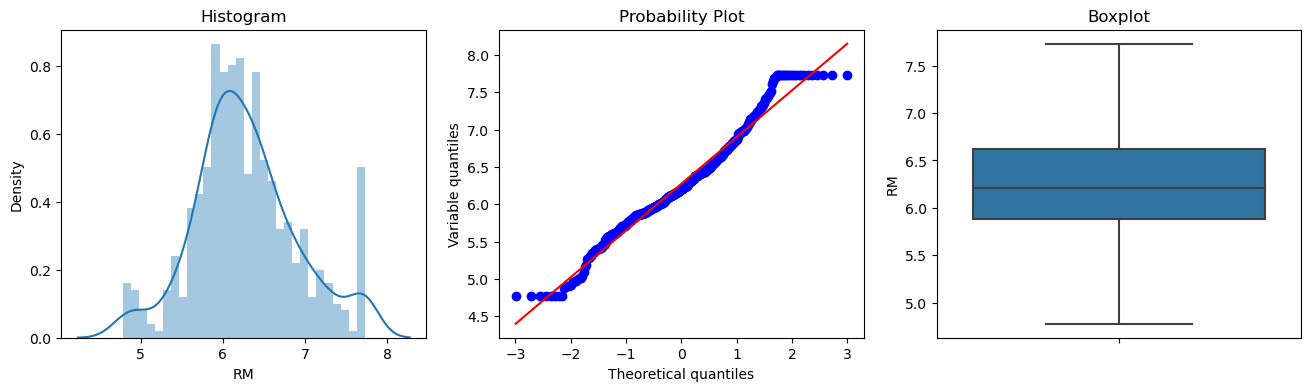

In [22]:
# diagnostic_plots for Capped variable dataset

diagnostic_plots(boston_t, 'RM')

In [23]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_    #Left tail caps / min value

{'RM': 4.778499999999999, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}

In [24]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_ #Right tail caps / max value

#i.e any value in RM which is greater that 7.73.. then it will be replace by the same!

{'RM': 7.730500000000001, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}